<a href="https://colab.research.google.com/github/enjoyPG/2024_Gifted/blob/main/02_240310_Bandit/bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강화 학습 환경 복습

In [1]:
!pip install gymnasium[classic-control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.1 MB/s eta 0:00:00


### 강화 학습 문제를 직접 풀어낼 정책 정의

강화 학습에서는 어떤 함수를 학습하고자 하는 걸까요? 에이전트 안에는 상태 관측값(입력)을 받고 그것을 앞으로 취해야 할 최적의 행동(출력)에 매핑하는 함수가 있습니다. 예를 들어, 미로 속 에이전트의 현재 상태가 $(2, 3)$ 좌표라면, 에이전트 안의 함수는 이 입력값을 "오른쪽으로 이동"이라는 출력값에 매핑하는 것이 될 수 있습니다. 이 함수를 $\pi$라고 한다면, 아래와 같이 수식으로 쓸 수 있습니다.
$$
\pi((2, 3)) = \text{"오른쪽으로 이동"}
$$
강화 학습 용어로 이 함수를 정책(policy)이라고 부릅니다.

In [ ]:
def policy(state):
    x_position = state[0]
    x_velocity = state[1]

    if x_velocity > 0:
        action = 2
    elif x_velocity < 0:
        action = 0
    else:
        if x_position > -0.6:
            action = 0
        else:
            action = 2

    return action

### 강화 학습이 돌아가는 환경의 코드 복습

1. 인공지능 모델은 환경의 현재 상태(state)를 관찰할 수 있습니다. 미로 찾기 문제에서 환경의 현재 상태란 미로 속 현재 위치를 의미합니다. 예를 들어, 모델이 미로의 $(2, 3)$ 좌표에 있다면, 이 좌표는 현재 상태를 나타냅니다.

2. 인공지능 모델은 관찰된 상태로부터 앞으로 취할 행동(action)을 결정합니다. 양갈래 길 중에서 어디로 갈지 결정하는 것 등이 그 예시가 될 수 있습니다.

3. 환경은 상태를 변경(transition)시키고 그 행동에 대한 보상(reward)을 생성합니다. 인공지능 모델은 그 상태와 보상을 다 받습니다. 미로 찾기 문제에서 환경의 변화란 인공지능 모델의 (앞선 결정에 따른) 미로 속 위치 변화를 의미합니다. 예를 들어, '오른쪽으로 이동' 행동을 취하면, 에이전트의 위치 좌표가 $(2, 3)$에서 $(2, 4)$로 바뀔 수 있습니다. 보상은 출구를 찾았을 때 주어지는 경품이나 막다른 길에 도달했을 때 받는 페널티 등을 생각해 볼 수 있습니다.

4.  이 새로운 정보(환경의 변화와 이에 따른 보상)를 사용하여 인공지능은 그런 행동이 좋아 그걸 반복해야 하는지, 또는 좋지 않아 회피해야 하는지 결정할 수 있습니다. 완료될 때까지 (done) 이 관측-행동-보상 사이클은 계속됩니다.

In [ ]:
import gymnasium as gym

env = gym.make('MountainCar-v0')
state, _ = env.reset()
print("Initial state:", state)

done = False
total_reward = 0
while not done:
    action = policy(state)
    print("Chose action:", action)
    state, reward, done, _, _ = env.step(action)
    total_reward += reward
    print("New state:", state)
    print("Reward:", reward)

print("Final state:", state)
print("Total reward:", total_reward)
env.close()


### 환경 직접 만들어보기

In [ ]:
class MyEnv(gym.Env):
    def __init__(self):
        self.observation_space = gym.spaces.Discrete(7, start=-3)
        self.action_space = gym.spaces.Discrete(2)
        self.num_steps = 0

    def reset(self):
        state = 0
        return state

    def step(self, action):
        self.num_steps += 1

        if action == 0:
            next_state = state - 1
        else:
            next_state = state + 1

        if next_state > 3:
            next_state = 3
        elif next_state < -3:
            next_state = -3

        reward = {
            -3: 1,
            -2: 1,
            -1: 1,
            0: 0,
            1: -1,
            2: -1,
            3: 10
        }[next_state]

        done = self.num_steps >= 3
        return next_state, reward, done, {}


In [ ]:
class StudentMDP(gym.Env):
    def __init__(self):
        # 0: 수업, 1: 야자, 2: 집, 3: 잘침, 4: 못침
        self.observation_space = gym.spaces.Discrete(5)

        # 0: 공부, 1: 딴짓, 2: 땡땡이, 3: 쇼츠보기, 4: 벼락치기, 5: 수면
        self.action_space = gym.spaces.Discrete(6)

    def reset(self):
        state = ???
        return state

    def step(self, action):
        state = ???
        reward = ???
        done = ???
        return state, reward, done, {}

# 슬롯머신 정복하기
## 제일 좋은 슬롯머신 찾는 문제

### 슬롯머신 환경 구현하기

각각의 밴딧 $i = 1, \cdots, n$에 대해, 먼저 랜덤하게 실제 가치 $\mu_{i} \sim N(0, 1)$를 평균 0 분산 1인 표준정규분포에서 추출해 정해줍니다. 그리고 $i$번 째 밴딧을 고를 경우, 받을 수 있는 보상은 다음과 같이 정해줍니다:
$$
r_{t} = \mu_{i} + \varepsilon \quad \text{where} \quad \varepsilon \sim N(0, 1)
$$
즉, $i$번 째 밴딧을 골랐을 때의 보상은, 그 밴딧의 실제 가치 $\mu_{i}$에 랜덤한 표준 정규 노이즈 $\varepsilon \sim N(0, 1)$을 더한 것입니다.

In [53]:
import numpy as np
np.random.normal(size=10)

array([ 1.66658781, -1.16342395, -0.32496306, -1.78116278, -1.50705476,
        1.95490165, -1.12724276,  0.14855071,  1.54192025,  1.30385115])

In [61]:
import numpy as np
import gymnasium as gym

class BanditEnv(gym.Env):
    def __init__(self, num_bandits):
        self.num_bandits = num_bandits # 슬롯머신의 개수
        self.action_space = list(range(num_bandits)) # 행동은 가능한 모든 슬롯머신
        self.observation_space = [0] #상태는 의미 없음, 매 번 독립시행

    def reset(self):
        #각 슬롯머신에 대해, 랜덤한 평균 보상의 크기를 결정하기 위해 정규분포 이용
        #self.mean = np.random.normal(size=self.num_bandits) *10 # 10을 곱해서 평균의 크기를 키워서 보기좋게

        #임의의 숫자를 지정해서 값이 항상 일정하게 나오게 세팅
        self.mean = [8, 9, 7.5, 7, 8.5, 7, 6, 7.5, 8, 8.5]

        return 0 # 상태 전환 없음, 의미 없음

    def step(self, action):
        state = 0
        mean = self.mean[action] #선택한 슬롯머신의 값
        reward = mean + np.random.normal() #보상은 해당 슬롯머신의 평균값 + 랜덤한 노이즈(정규분포)
        done = False
        return state, reward, done, {}

In [73]:
class MyPolicy:
  def __init__(self, num_bandits):
    self.num_bandits = num_bandits # 슬롯머신 개수 저장
    # 이 아래에 본인이 더 저장하고 싶은 정보 정의 가능!
    self.q = [0 for machine in range(num_bandits)]

    # 예시
    # self.q = [8, 6, 7, 7, 6, ..., 2] -> 슬롯머신마다 계산한 평균값

  def __call__(self, state, reward):
    action = np.argmax(self.q) #가장 큰 값이 위치한 index값
    return action

0
1
2
3
4
5
6
7
8
9
1
4
5
0
8
3
2
9
6
7
Total Reward: 149.09071760431146


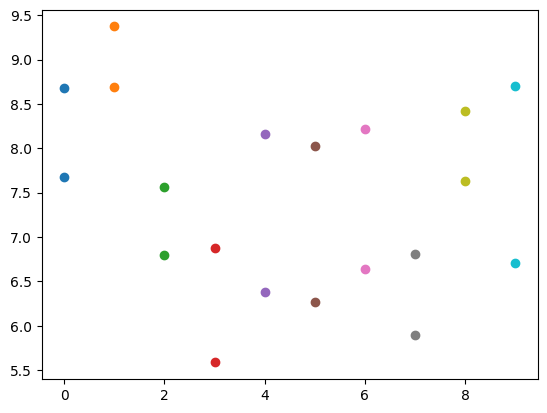

In [81]:
env = BanditEnv(10)
state = env.reset()
agent = MyPolicy(10)
reward = 0

# 그동안의 선택 정보를 저장(슬롯머신의 보상 기록 저장을 위한 리스트)
history = {i: [100] for i in range(env.num_bandits)}

total_reward = 0
for t in range(20):
  action = agent(state, reward)
  print(action)
  #action = np.random.choice(env.num_bandits)
  state, reward, done, _ = env.step(action)

  #기록 저장
  history[action].append(reward)
  agent.q = [sum(history[i]) / max(1, len(history[i])) for i in range(env.num_bandits)]

  #print(f"Action: {action}")
  #print(f"Reward: {reward}")
  total_reward += reward

print(f"Total Reward: {total_reward}")

# 기록 플롯
import matplotlib.pyplot as plt
for machine in range(env.num_bandits):
  plt.scatter([machine]*(len(history[machine])-1), history[machine][1:])

### 슬롯머신 풀어보기

직접 위 환경과 상호작용하면서, 각 슬롯머신의 보상을 추정해보세요. 그리고 Python을 이용해 위 문제에서 $\epsilon=0.1$과 $\epsilon=0.01$에 대해 각각 $\epsilon$-greedy 방법을 적용해 보세요. (초기값 $Q_{1}(i)$는 모두 0으로 설정.) 또한 $Q_{1}(i) = 5$인 완전 탐욕적인 알고리즘 ($\epsilon=0$) 또한 Python으로 구현하여 그 결과를 비교해 보세요.

In [ ]:
import numpy as np

class EpsilonGreedyPolicy:
    def __init__(self, num_bandits, epsilon):
        self.num_bandits = num_bandits
        self.epsilon = epsilon
        ????

    def select_action(self):
        action = ????
        return action


env = BanditEnv(10)
policy = EpsilonGreedyPolicy(10, 0.1)

state = env.reset()
total_reward = 0
for t in range(100):
    action = policy.select_action()
    state, reward, done, _ = env.step(action)
    print("Action:", action, "Reward:", reward)
    total_reward += reward

print("Total reward:", total_reward)